In [29]:
%%HTML
<link rel="stylesheet" type="text/css" href="https://raw.githubusercontent.com/sindresorhus/github-markdown-css/gh-pages/github-markdown.css">
<style type="text/css">
text-align: left;
</style>


# Kaggleに挑戦！
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<div style="text-align: right;">
武田 洋之
</div>


## 何やろうか？

- ロジスティック回帰面白かったな
- 階層ベイズは、自分ではまだあまり触れていないから使えるやつがいいな

両方でモデルを作って、結果を比較したら面白んじゃないか？

講義ではR中心だったが、自分は、将来は統計知識をアプリケーションに組み込みたい。
→ 言語はPythonに決定！


## データをどこで探したらいいかわからない！

というわけで、松本先生に相談
<a href="https://github.com/3ign0n/hw8/blob/gh-pages/images/whete-to-find-good-dataset.png?raw=true"><img src="https://github.com/3ign0n/hw8/blob/gh-pages/images/whete-to-find-good-dataset.png?raw=true" width="256"></a>


- クックパッドのデータ
https://www.nii.ac.jp/dsc/idr/cookpad/cookpad.html

→ 面白そうだけど、大学の研修室が対象っぽく断念。


- ユーザー離脱予測
https://signate.jp/competitions/10

→ お！これ面白そう！と思ったけど、データが既に非公開に。。。

んー、なかなかほどいい感じのが見つからない。
解析対象データ難民。。。

## データセット

ちょうどいいっぽいデータを発見！


Data Science Nigeria Telecoms Churn

Predict the likelihood of churn among mobile telephone subscribers using a balanced dataset

https://www.kaggle.com/c/dsntelecomschurn2018/data



In [30]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [31]:
df = pd.read_csv("data/TRAIN.csv")

In [32]:
df
#print(df.describe())
df.sort_values(by='Customer ID')

,Customer ID,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2,Churn Status
1225,ADF0038,117.0,3.90,49.6700,0.00,38.75,6.941061e+03,1.0,0.0,1092.0,1.0,NaN,3G,Mango,Mango,0.0
0,ADF0039,123.0,4.10,76.7140,0.00,1.25,1.495100e+00,14.0,564.0,6408.0,2.0,2G,2G,Uxaa,Mango,0.0
304,ADF0040,1342.0,44.73,76.9200,11.96,1.25,7.514600e+00,5.0,251.0,1004.0,2.0,3G,3G,Zintel,Mango,0.0
1,ADF0041,1316.0,43.87,98.8904,4.14,1.25,1.024400e+00,27.0,1626.0,4373.0,1.0,2G,2G,Uxaa,Mango,0.0
1226,ADF0042,247.0,8.23,152.9120,0.02,15.00,3.241738e+07,6.0,12.0,1145.0,2.0,NaN,3G,Mango,Mango,0.0
305,ADF0043,425.0,14.17,188.4484,0.00,53.75,1.590594e+07,4.0,114.0,1594.0,1.0,3G,3G,PQza,Mango,0.0
306,ADF0044,698.0,23.27,197.3260,0.00,93.31,8.524836e+04,8.0,1372.0,632.0,4.0,3G,3G,Mango,Mango,0.0
940,ADF0045,619.0,20.63,212.4100,80.86,2.50,3.861130e+01,17.0,3972.0,2339.0,1.0,Other,Other,Zintel,Mango,0.0
307,ADF0046,261.0,8.70,219.6500,5.98,48.75,3.437368e+05,26.0,228.0,5008.0,1.0,3G,3G,Uxaa,Mango,0.0
941,ADF0047,4082.0,136.07,262.2800,0.00,2.50,8.673800e+00,79.0,2640.0,16450.0,2.0,Other,Other,Zintel,Mango,0.0


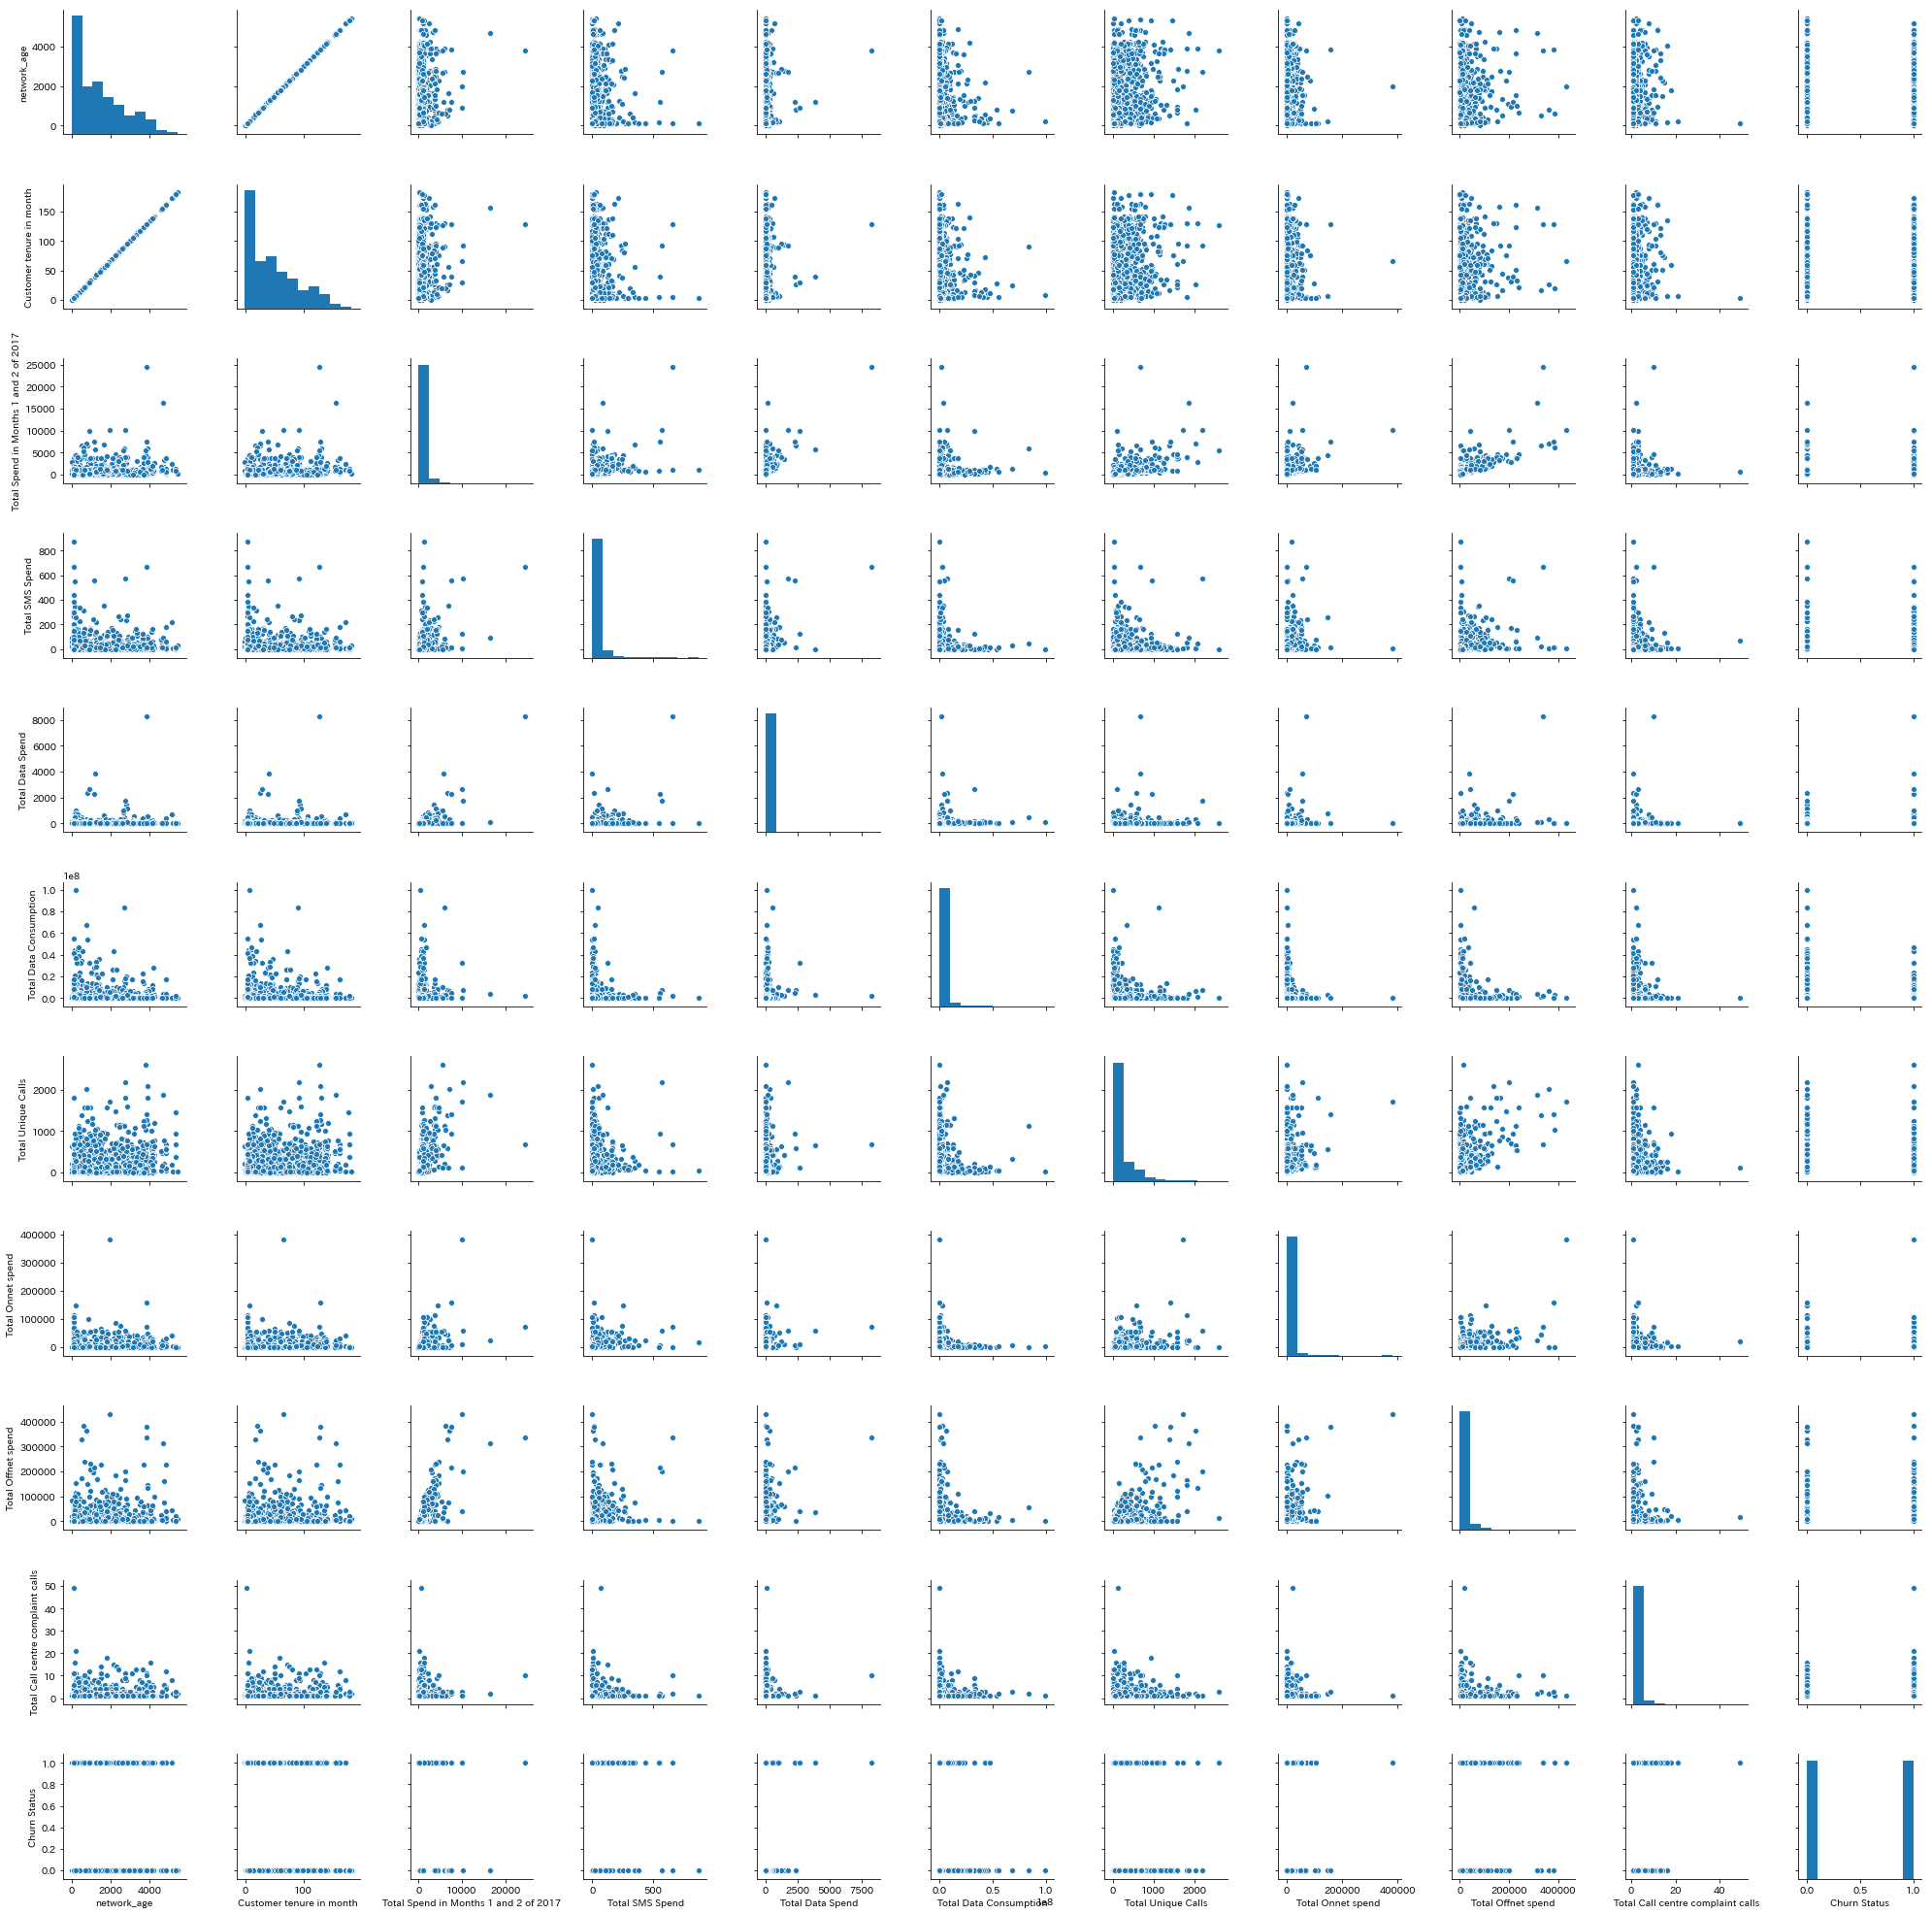

In [33]:
sns.pairplot(df)

In [34]:
df.dtypes


Customer ID                                     object
network_age                                    float64
Customer tenure in month                       float64
Total Spend in Months 1 and 2 of 2017          float64
Total SMS Spend                                float64
Total Data Spend                               float64
Total Data Consumption                         float64
Total Unique Calls                             float64
Total Onnet spend                              float64
Total Offnet spend                             float64
Total Call centre complaint calls              float64
Network type subscription in Month 1            object
Network type subscription in Month 2            object
Most Loved Competitor network in in Month 1     object
Most Loved Competitor network in in Month 2     object
Churn Status                                   float64
dtype: object

## preprocessing the data

- 全部NaNなものはdrop
- Customer IDは、churnには影響しないと思われるのでdrop
- network type, loved competitorで、NaNなデータは、unknownで補完する。また、カテゴリカルデータなので'category'（※）に変換

※ python(pandas)のcategoryというデータ型は、Rのfactor相当


In [35]:
df1 = df.dropna(how='all')
#df1.sort_values(by='cid')

df1 = df1.drop(['Customer ID'], axis=1)
df1 = df1.rename(columns={'Customer tenure in month': 'tenure', 'network_age': 'age', 'Total Spend in Months 1 and 2 of 2017': 'spend_total', 'Total SMS Spend': 'spend_sms', 'Total Data Spend': 'spend_data', 'Total Data Consumption': 'consumption_data', 'Total Unique Calls': 'calls', 'Total Onnet spend ': 'onnet', 'Total Offnet spend': 'offnet', 'Total Call centre complaint calls': 'complaint', 'Network type subscription in Month 1': 'nettype1', 'Network type subscription in Month 2': 'nettype2', 'Most Loved Competitor network in in Month 1': 'loved_competitor1', 'Most Loved Competitor network in in Month 2': 'loved_competitor2', 'Churn Status': 'churn'})

df1['nettype1'].unique()
df1['loved_competitor1'] .unique()
df1 = df1.fillna({'nettype1': 'unknown', 'nettype2': 'unknown', 'loved_competitor1': 'unknown', 'loved_competitor2':'unknown'})
df1['nettype1'] = df1['nettype1'].astype('category')
df1['nettype2'] = df1['nettype2'].astype('category')
df1['loved_competitor1'] = df1['loved_competitor1'].astype('category')
df1['loved_competitor2'] = df1['loved_competitor2'].astype('category')

df1.dtypes
df1.head()

,age,tenure,spend_total,spend_sms,spend_data,consumption_data,calls,onnet,offnet,complaint,nettype1,nettype2,loved_competitor1,loved_competitor2,churn
0,123.0,4.10,76.7140,0.00,1.25,1.4951,14.0,564.0,6408.0,2.0,2G,2G,Uxaa,Mango,0.0
1,1316.0,43.87,98.8904,4.14,1.25,1.0244,27.0,1626.0,4373.0,1.0,2G,2G,Uxaa,Mango,0.0
2,2385.0,79.50,372.6300,3.51,1.25,6.0898,119.0,10411.0,22039.0,1.0,2G,2G,Weematel,Mango,0.0
3,1614.0,53.80,530.2000,6.85,1.25,3.3447,69.0,6822.0,6274.0,1.0,2G,2G,0,Mango,0.0
4,2175.0,72.50,554.1300,6.99,153.75,673204.0342,33.0,3387.0,7241.0,1.0,2G,3G,Weematel,Mango,0.0


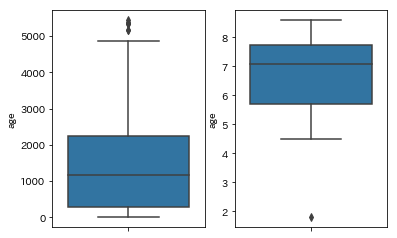

In [36]:
plt.subplot(1, 2, 1)
sns.boxplot(y=df1['age'])

plt.subplot(1, 2, 2)
sns.boxplot(y=np.log(df1['age']))


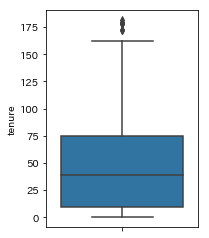

In [37]:
plt.subplot(1, 2, 1)
sns.boxplot(y=df1['tenure'])



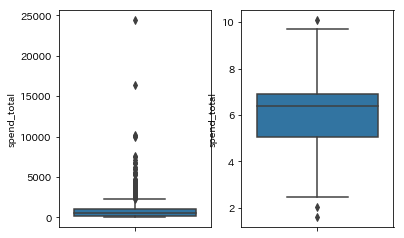

In [38]:
plt.subplot(1, 2, 1)
sns.boxplot(y=df1['spend_total'])

plt.subplot(1, 2, 2)
sns.boxplot(y=np.log(df1['spend_total']))


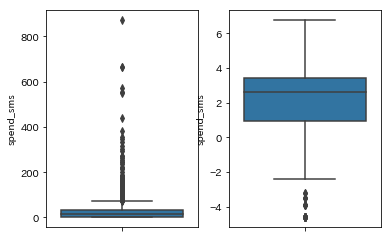

In [39]:

plt.subplot(1, 2, 1)
sns.boxplot(y=df1['spend_sms'])

plt.subplot(1, 2, 2)
sns.boxplot(y=np.log(df1['spend_sms']))

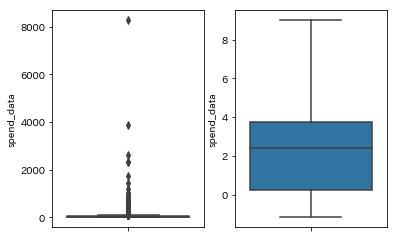

In [40]:

plt.subplot(1, 2, 1)
sns.boxplot(y=df1['spend_data'])

plt.subplot(1, 2, 2)
sns.boxplot(y=np.log(df1['spend_data']))

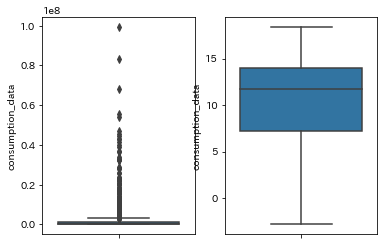

In [41]:

plt.subplot(1, 2, 1)
sns.boxplot(y=df1['consumption_data'])

plt.subplot(1, 2, 2)
sns.boxplot(y=np.log(df1['consumption_data']))


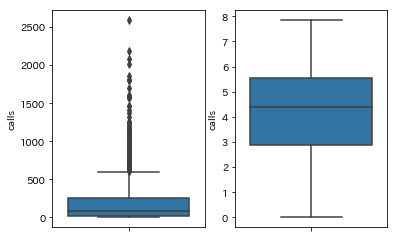

In [42]:


plt.subplot(1, 2, 1)
sns.boxplot(y=df1['calls'])

plt.subplot(1, 2, 2)
sns.boxplot(y=np.log(df1['calls']))


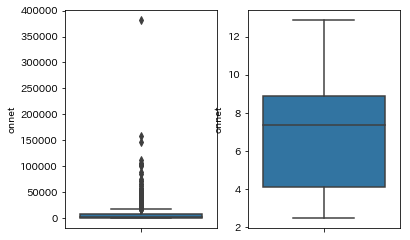

In [43]:


plt.subplot(1, 2, 1)
sns.boxplot(y=df1['onnet'])

plt.subplot(1, 2, 2)
sns.boxplot(y=np.log(df1['onnet']))


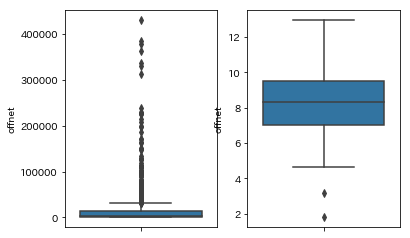

In [44]:


plt.subplot(1, 2, 1)
sns.boxplot(y=df1['offnet'])

plt.subplot(1, 2, 2)
sns.boxplot(y=np.log(df1['offnet']))

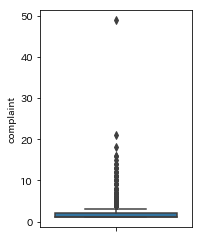

In [45]:
plt.subplot(1, 2, 1)
sns.boxplot(y=df1['complaint'])


In [46]:
df1[df1['complaint'] > 3].shape[0]


143

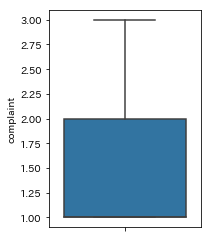

In [47]:
# コールセンターに苦情を入れてくる人。3回以上やる人たちは一部なので、まとめる（３回と同じ扱い）
df1.complaint = df1.complaint.where(df1.complaint < 3, 3)

plt.subplot(1, 2, 1)
sns.boxplot(y=df1['complaint'])


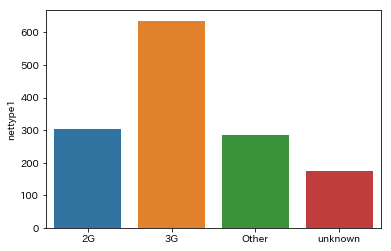

In [48]:
sns.barplot(x=df1.nettype1.value_counts().index, y=df1.nettype1.value_counts())

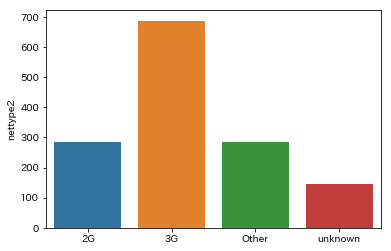

In [49]:
sns.barplot(x=df1.nettype2.value_counts().index, y=df1.nettype2.value_counts())

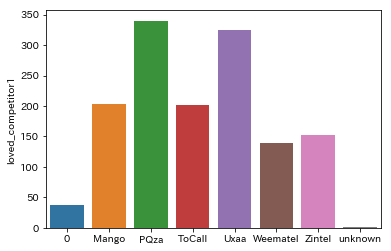

In [50]:
sns.barplot(x=df1.loved_competitor1.value_counts().index, y=df1.loved_competitor1.value_counts())


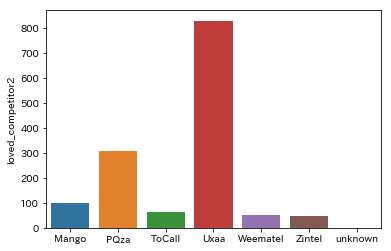

In [51]:
sns.barplot(x=df1.loved_competitor2.value_counts().index, y=df1.loved_competitor2.value_counts())

In [52]:
df2 = df1
df2.spend_total = np.log(df2.spend_total)
df2.spend_sms = np.log(df2.spend_sms)
df2.spend_data = np.log(df2.spend_data)
df2.consumption_data = np.log(df2.consumption_data)
df2.calls = np.log(df2.calls)
df2.onnet = np.log(df2.onnet)
df2.offnet = np.log(df2.offnet)

df2.head()


,age,tenure,spend_total,spend_sms,spend_data,consumption_data,calls,onnet,offnet,complaint,nettype1,nettype2,loved_competitor1,loved_competitor2,churn
0,123.0,4.10,4.340084,-inf,0.223144,0.402193,2.639057,6.335054,8.765302,2.0,2G,2G,Uxaa,Mango,0.0
1,1316.0,43.87,4.594012,1.420696,0.223144,0.024107,3.295837,7.393878,8.383205,1.0,2G,2G,Uxaa,Mango,0.0
2,2385.0,79.50,5.920586,1.255616,0.223144,1.806615,4.779123,9.250618,10.000569,1.0,2G,2G,Weematel,Mango,0.0
3,1614.0,53.80,6.273254,1.924249,0.223144,1.207377,4.234107,8.827908,8.744169,1.0,2G,2G,0,Mango,0.0
4,2175.0,72.50,6.317399,1.944481,5.035328,13.419804,3.496508,8.127700,8.887515,1.0,2G,3G,Weematel,Mango,0.0


In [53]:
df2.spend_sms[np.isneginf(df2.spend_sms)] = 0
df2.spend_data[np.isneginf(df2.spend_data)] = 0
df2.consumption_data[np.isneginf(df2.consumption_data)] = 0
df2.onnet[np.isneginf(df2.onnet)] = 0
df2.offnet[np.isneginf(df2.offnet)] = 0
df2.head()

,age,tenure,spend_total,spend_sms,spend_data,consumption_data,calls,onnet,offnet,complaint,nettype1,nettype2,loved_competitor1,loved_competitor2,churn
0,123.0,4.10,4.340084,0.000000,0.223144,0.402193,2.639057,6.335054,8.765302,2.0,2G,2G,Uxaa,Mango,0.0
1,1316.0,43.87,4.594012,1.420696,0.223144,0.024107,3.295837,7.393878,8.383205,1.0,2G,2G,Uxaa,Mango,0.0
2,2385.0,79.50,5.920586,1.255616,0.223144,1.806615,4.779123,9.250618,10.000569,1.0,2G,2G,Weematel,Mango,0.0
3,1614.0,53.80,6.273254,1.924249,0.223144,1.207377,4.234107,8.827908,8.744169,1.0,2G,2G,0,Mango,0.0
4,2175.0,72.50,6.317399,1.944481,5.035328,13.419804,3.496508,8.127700,8.887515,1.0,2G,3G,Weematel,Mango,0.0


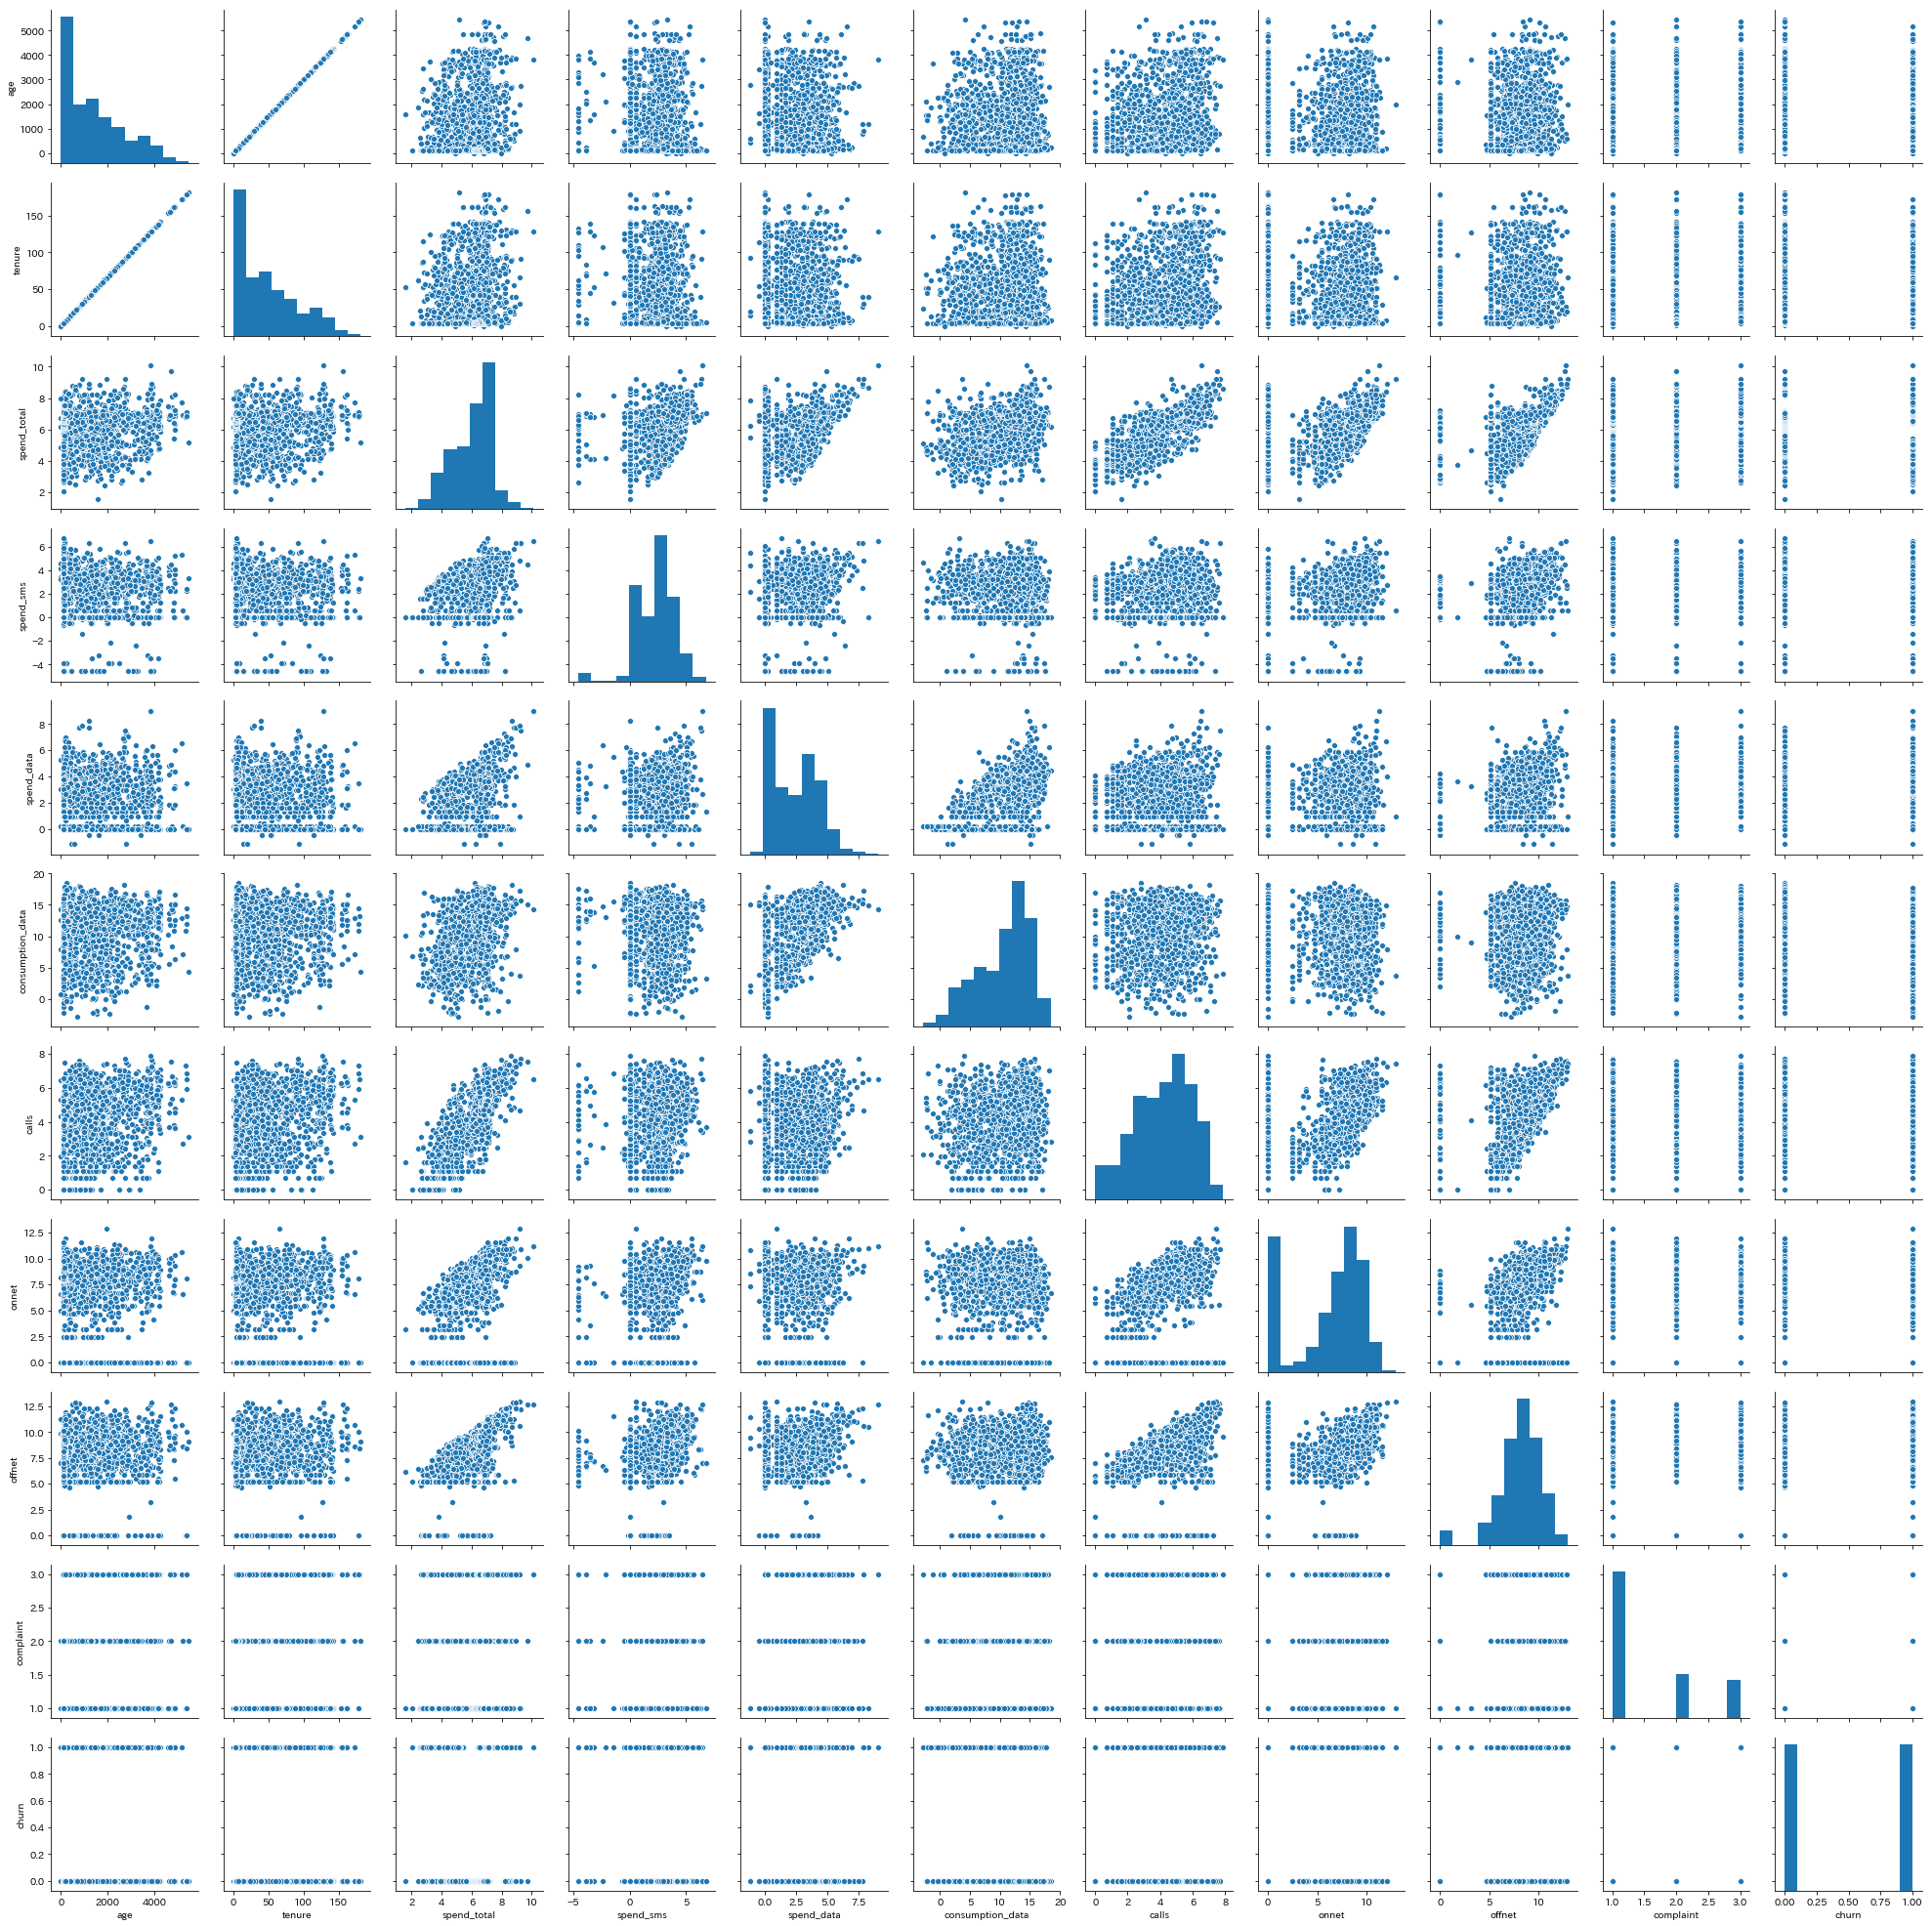

In [59]:
sns.pairplot(df2)

In [55]:
# kaggleに付いているTEST.CSVは、答えがないので、あとで当てはまり度を見るために、TRAIN.CSVの方をモデル作成用と、当てはめ用に分割
df_train, df_test = train_test_split(df2, test_size=0.25)


In [56]:
df_train.head()
df_train.shape

df_test.head()
df_test.shape

explanatory = df2.drop(['churn'], axis=1).columns
explanatory


Index(['age', 'tenure', 'spend_total', 'spend_sms', 'spend_data',
       'consumption_data', 'calls', 'onnet', 'offnet', 'complaint', 'nettype1',
       'nettype2', 'loved_competitor1', 'loved_competitor2'],
      dtype='object')

## buildind a model 1

- 目的変数"churn"が0、1なので、ロジスティック回帰モデルを使う
- 説明変数がたくさんあるが、全部をそのまま使おうとすると多重共線性が発生しそう
- network_ageは全体の契約期間、Customer tenure in monthはその月の在籍期間っぽいので、tenureだけを使うのが良さそう
- Total Spend in Months 1 and 2 of 2017は、SMSやDataなどの合計になってると思われるから、使わなくて良さそう

In [57]:
import statsmodels.api as sm
from statsmodels.formula.api import glm

m1 = glm(formula='churn ~ tenure + spend_sms + spend_data + consumption_data + calls + onnet + offnet + complaint + nettype1 + nettype2 + loved_competitor1 + loved_competitor2', data=df2, family=sm.families.Binomial())
result = m1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                 1400
Model:                            GLM   Df Residuals:                     1374
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -792.28
Date:                Fri, 08 Feb 2019   Deviance:                       1584.6
Time:                        05:58:08   Pearson chi2:                 1.40e+03
No. Iterations:                    19   Covariance Type:             nonrobust
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         0.6998      0.568      1.233      0.218      -0.413       1.812
nettype1[T.3G]                   -0.1624      0.272     -0.596      0.551      -0.696       0.371
nettype1[T.Other]                 0.1562      0.098      1.593      0.111      -0.036       0.348
nettype1[T.unknown]              -0.6385      0.382     -1.671      0.095      -1.387       0.110
nettype2[T.3G]                    0.2557      0.279      0.917      0.359      -0.291       0.802
nettype2[T.Other]                 0.1562      0.098      1.593      0.111      -0.036       0.348
nettype2[T.unknown]               0.4077      0.406      1.004      0.315      -0.388       1.203
loved_competitor1[T.Mango]        0.7533      0.411      1.833      0.067      -0.052       1.559
loved_competitor1[T.PQza]         0.8146      0.403      2.020      0.043       0.024       1.605
loved_competitor1[T.ToCall]       0.5100      0.411      1.241      0.215      -0.296       1.316
loved_competitor1[T.Uxaa]         0.7311      0.400      1.830      0.067      -0.052       1.514
loved_competitor1[T.Weematel]     0.5121      0.426      1.203      0.229      -0.322       1.346
loved_competitor1[T.Zintel]       0.2754      0.423      0.651      0.515      -0.554       1.105
loved_competitor1[T.unknown]    -10.2089   8865.185     -0.001      0.999   -1.74e+04    1.74e+04
loved_competitor2[T.PQza]         0.0444      0.286      0.155      0.877      -0.516       0.605
loved_competitor2[T.ToCall]      -0.0397      0.370     -0.107      0.915      -0.765       0.685
loved_competitor2[T.Uxaa]        -0.5303      0.257     -2.067      0.039      -1.033      -0.028
loved_competitor2[T.Weematel]     0.4444      0.404      1.100      0.271      -0.348       1.236
loved_competitor2[T.Zintel]       0.1234      0.406      0.304      0.761      -0.673       0.920
loved_competitor2[T.unknown]    -10.2089   8865.185     -0.001      0.999   -1.74e+04    1.74e+04
tenure                           -0.0037      0.002     -2.475      0.013      -0.007      -0.001
spend_sms                         0.3221      0.041      7.952      0.000       0.243       0.401
spend_data                        0.0171      0.041      0.419      0.675      -0.063       0.097
consumption_data                 -0.0911      0.018     -5.000      0.000      -0.127      -0.055
calls                            -0.1934      0.054     -3.571      0.000      -0.300      -0.087
onnet                            -0.1388      0.023     -6.081      0.000      -0.184      -0.094
offnet                            0.1644      0.044      3.772      0.000       0.079       0.250
complaint                        -0.2699      0.083     -3.270      0.001      -0.432      -0.108
=================================================================================================
"""

In [63]:
sns.residplot(result.residual, result.fittedvalues, lowess=True)

AttributeError: 'GLMResults' object has no attribute 'residual'

## buildind a model 2
### ベイズ統計

事前分布f(θ)はわからないので、無情報事前分布。
$$
$$

In [75]:
import pymc3 as pm

np.random.seed(123456)

with pm.Model() as model:
    # 事前分布として一様分布を採用(無情報事前分布)
    p_theta = pm.Uniform('p_theta', 0, 1.0)

    # churnするかは二項分布分布から生成される
    y = pm.Binomial("y", p=p_theta, observed=df1)

TypeError: __init__() missing 1 required positional argument: 'n'

In [ ]:
with model:
    start = pm.find_MAP()
    
    # Don’t Use Metropolis
    # https://discourse.pymc.io/t/dont-use-metropolis/691
    step = pm.NUTS()
    trace = pm.sample(niter, step, start)

In [ ]:
import pystan


数式
https://qiita.com/namoshika/items/63db972bfd1030f8264a

$$
    % 空白は表示に影響しない。コメントは"%"で始める
    % 下付き文字は"_a"、上付き文字は"^a"
    % 改行は"\\"を付ける
    y_1 = ax^2 \\
    % 複数文字を1要素とする際は{...}で囲う
    % 空白は"\quad"
    y_2 = ax^{10} \quad y_3 = ax \\
$$